In [31]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_file("/data/bokeh_output.html")
from qgrid import show_grid
# import finplot as fplt

import polygon_rest_api as papi
import polygon_ws_api as pws
import polygon_df as pdf
import polygon_ds as pds
import polygon_s3 as ps3

import bar_samples as bs
import bar_labels as bl
import bar_meta as bm
import filters as ft

import flow_backfill as fb
import ray_backfill as rb

# import market_cluster as mc

import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = [20, 7]

# import ipdb
# ipdb.set_trace(context=10)

# df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG' are other good diverging colormaps
# pd.set_option('precision', 2)

# .plot_bokeh(sizing_mode="scale_height")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
symbol='GLD'
start_date = '2020-10-01'
end_date = '2020-10-30'
tick_type='trades'
# symbol = 'market'
# tick_type='daily'
date = '2020-03-12'

thresh = {
    # max thresholds
    'renko_reveral_multiple': 2,
    'max_duration_sec': 60*60,
    # min thresholds
    'min_duration_sec': 15,
    'min_tick_count': 30,
}

horizon_mins = 30

In [120]:
thresh.update({'renko_size': 0.1})

ticks_df = ps3.fetch_date_df(symbol, date, tick_type='trades')

# sample bars
bars, bar_state, ticks = bs.build_bars(ticks_df[0:999], thresh)

GLD 2020-03-12 trying to get data from local file...


<AxesSubplot:>

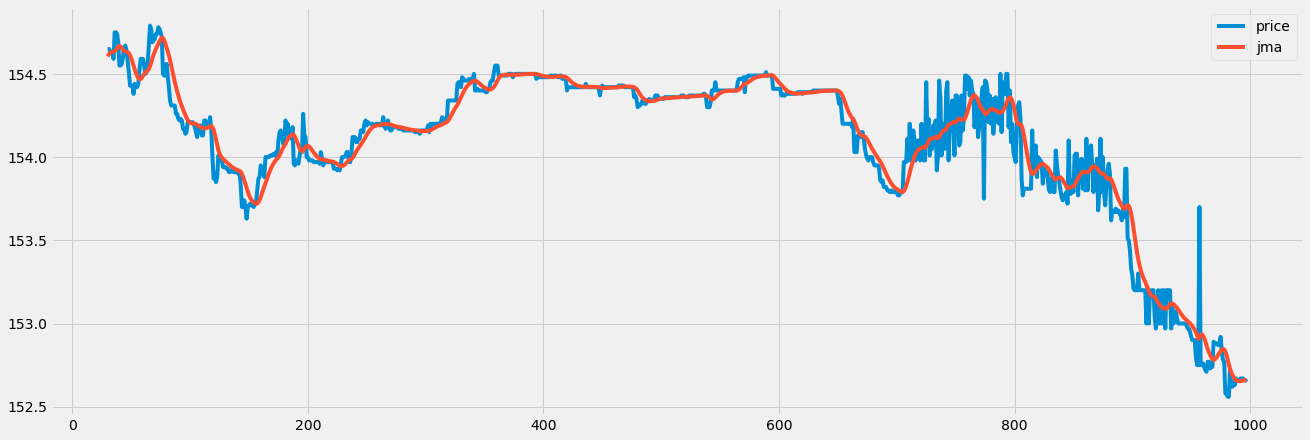

In [131]:
pd.DataFrame(ticks)[['price', 'jma']][30:-1].plot()

<AxesSubplot:>

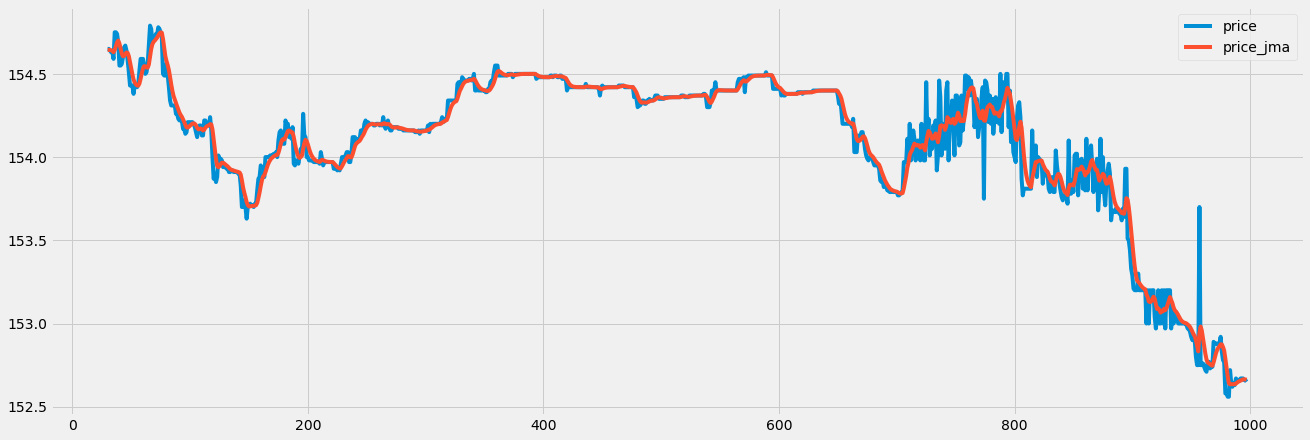

In [132]:
tdf = ticks_df.loc[ticks_df.irregular==False][0:999]

ft.jma_filter_df(tdf, 'price', length=5, power=1, expand=False)[['price', 'price_jma']][30:-1].plot()

In [ ]:
ray.init(ignore_reinit_error=True, num_cpus=4, dashboard_port=8080)

In [ ]:
ray.shutdown()

In [ ]:
daily_bar_stats_df, labeled_bar_dates, stacked_bars_df = bm.bars_workflow_ray(
    symbol, 
    start_date,
    end_date, 
    thresh,
)

In [ ]:
fb.run_backfill(symbols=['GLD'], tick_type='trades', start_date='2019-01-01')
# fb.run_backfill(symbols=['market'], tick_type='daily', start_date='2010-01-01', n_workers=2, processes=True, threads_per_worker=4)

In [ ]:
from polygon_ds import get_dates_df

In [ ]:
df = get_dates_df(symbol='market', tick_type='daily', start_date='2020-10-01', end_date='2020-10-30', source='local')

In [ ]:
df = df.loc[df['symbol'] == symbol].reset_index(drop=True)

In [ ]:
import pickle 
data = (daily_bar_stats_df, labeled_bar_dates, stacked_bars_df)
file = open('test.pickle', mode='wb')
pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

input_file = open("test.pickle", "rb")
output = pickle.load(input_file)

In [ ]:
lbars_df[['price_wmean', 'label_rrr']].plot_bokeh(sizing_mode="scale_height")
# 17, 31

In [ ]:
lbars_df[['price_wmean', 'label_rrr']].plot(subplots=True, figsize=[17,12])